<a href="https://colab.research.google.com/github/AliAqdas-repo/wsi-scanner-segmentation/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports 

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#pip install pydicom

     |████████████████████████████████| 35.3MB 126kB/s 


In [ ]:
import os
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
from pathlib import Path
import cv2
from PIL import Image
import numpy as np
# import pydicom
# from pydicom.data import get_testdata_files
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path_img = Path('images')
#fnames = os.listdir(str(path_img))
#path_lbl = Path('masks')
#lblnames = os.listdir(str(path_lbl))
#fnames.sort()
#lblnames.sort()

## Importing inputs

In [ ]:
path_lbl = Path('/content/drive/My Drive/Datasets/WSI/DataTalha/masks')
path_img = Path('/content/drive/My Drive/Datasets/WSI/DataTalha/tiles')

fnames = get_image_files(path_img)
lbl_names = get_image_files(path_lbl)

In [ ]:
fnames[:5]

[PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/tiles/01-2461G_(2.02,10095,18171,2019,2019).png'),
 PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/tiles/01-2461G_(2.02,10095,14133,2019,2019).png'),
 PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/tiles/01-2461G_(2.02,10095,16152,2019,2019).png'),
 PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/tiles/01-2461G_(2.02,12114,10095,2019,2019).png'),
 PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/tiles/01-2461G_(2.02,12114,14133,2019,2019).png')]

In [ ]:
lbl_names[:5]

[PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/masks/01-2461G_(2.02,22209,10095,2019,2019)-labels.png'),
 PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/masks/01-2461G_(2.02,24228,10095,2019,2019)-labels.png'),
 PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/masks/01-2461G_(2.02,26247,10095,2019,2019)-labels.png'),
 PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/masks/01-2461G_(2.02,28266,10095,2019,2019)-labels.png'),
 PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/masks/01-2461G_(2.02,30285,10095,2019,2019)-labels.png')]

In [ ]:
# fnames[0]
# # path_img
# # os.path.join(str(path_img),fnames[0])
# fi = os.path.split(fnames[0])[1]
# os.path.splitext(fi)[0]

'01-2461G_(1.01,0,3024,4038,3024)'

In [ ]:
# # Converting to png
#  for k in range(0,len(fnames)):
#    im1 = Image.open(os.path.join(str(path_img),fnames[k]))
#    #im1.save(r'/content/drive/My Drive/Keratin Pearl/01-2461G/exported_files_png/new file name.png')
#   #  ds = pydicom.dcmread(os.path.join(str(path_img),fnames[k]))
#   #  I = ds.pixel_array/np.amax(ds.pixel_array)*255
#   #  I = I.astype('uint8')
#   #  im = Image.fromarray(I)
#    fi = os.path.split(fnames[k])[1]
#    filename = os.path.splitext(fi)[0]
#    im1.save(os.path.join('/content/drive/My Drive/Keratin Pearl/01-2461G/exported_files_png/', filename + '.png')) 

In [ ]:
# fii = os.path.split(fnames[0])[1]
# filename = os.path.splitext(fii)[0]
# filename


'01-2461G_(1.01,0,3024,4038,3024)'

In [ ]:
# #Renaming masks
# for k in range(0,len(lbl_names)):
#    I = Image.open(os.path.join(str(path_lbl),lbl_names[-1]))
#    filename = os.path.splitext(fnames[-1])[0]
#    I.save(os.path.join('/content/drive/My Drive/Keratin Pearl/01-2461G/Train_Sets_masks', filename + '.png')) 

KeyboardInterrupt: ignored

In [ ]:
#img = cv2.imread(str(get_y_fn(fnames[89])),0)
#img=img/127
#print(img[0,300:400])
#new_img = Image.fromarray((img).astype(np.uint8))

[1. 1. 1. 1. ... 1. 1. 1. 1.]


In [ ]:
#new_img.save('/content/test.png')

In [ ]:
#mask=open_mask('/content/test.png')
#mask.data[0,0,300:400]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])

In [ ]:
 #Real Preprocessing ( **PLEASE RUN ONLY ONCE** )
# for i in range(0, len(lbl_names)):   
 #   img = cv2.imread(str(lbl_names[i]), 0)
  #  new_img = img / 127
   # new_img = Image.fromarray((new_img).astype(np.uint8))
    ##plt.imshow(new_img, cmap = 'gray', interpolation = 'bicubic')
    ##plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    ##plt.show()
    #new_img.save(str(lbl_names[i]))

In [ ]:
# path_img_png = Path('/content/drive/My Drive/Keratin Pearl/01-2461G/exported_files_png')
# fnames_p = get_image_files(path_img_png)

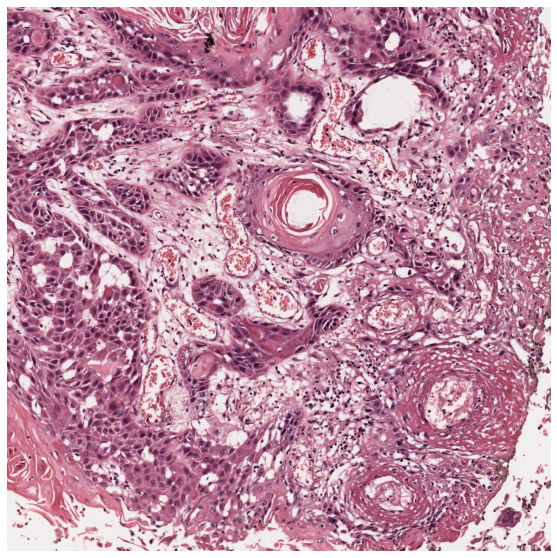

In [ ]:
img_f = fnames[89]
img = open_image(img_f)
img.show(figsize=(10,10))

In [ ]:
get_y_fn = lambda x: path_lbl/f'{x.stem}-labels{x.suffix}'

In [ ]:
lbl_names[1]

PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/masks/01-2461G_(2.02,26247,10095,2019,2019)-labels.png')

In [ ]:
img_f

PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/tiles/01-2461G_(2.02,32304,22209,2019,2019).png')

In [ ]:
get_y_fn(img_f)

PosixPath('/content/drive/My Drive/Datasets/WSI/DataTalha/masks/01-2461G_(2.02,32304,22209,2019,2019)-labels.png')

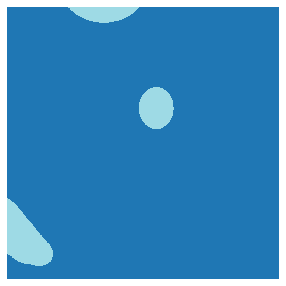

In [ ]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [ ]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([1000, 1000]), tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [ ]:
mask.data[0,0,300:500]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#codes = np.loadtxt(Path('/content/drive/My Drive/Keratin Pearl/Tiling/codes.txt'), dtype=str)
codes=np.array(['Background','Keratin_Pearl'],dtype=str); codes

array(['Background', 'Keratin_Pearl'], dtype='<U13')

## Creating ImageDataBunch

In [ ]:
size = src_size

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=2
else:           bs=1
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=2, have 15068MB of GPU RAM free


In [ ]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_rand_pct(0.15)
       .label_from_func(get_y_fn, classes=codes))

In [ ]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

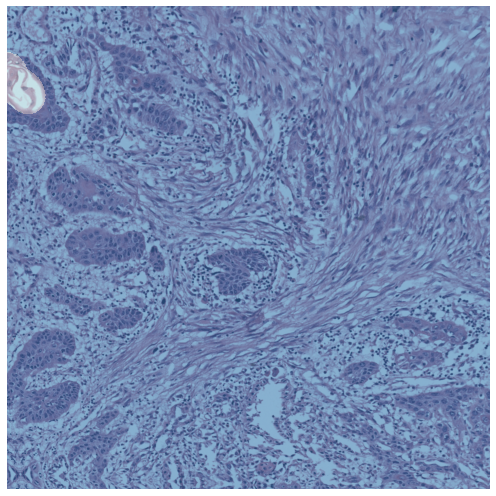

In [ ]:
data.show_batch(1, figsize=(10,7))

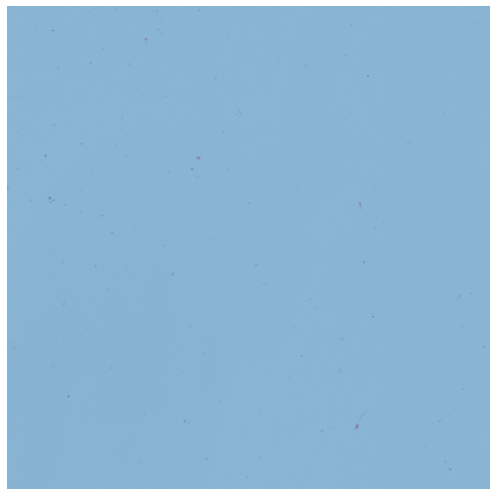

In [ ]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

In [ ]:
name2id = {v:k for k,v in enumerate(codes)}
print(name2id)
void_code = name2id['Background']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

{'Background': 0, 'Keratin_Pearl': 1}


In [ ]:
metrics=acc_camvid
# metrics=accuracy

## Creating Unet Learner Object

In [ ]:
wd=1e-2 #weight decay

In [ ]:
learn = unet_learner(data, models.resnet34, metrics=[dice,fbeta], wd=wd)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


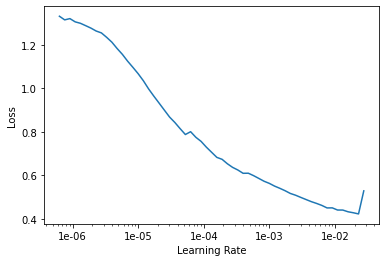

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr=1e-5

In [ ]:
learn.fit_one_cycle(5, slice(lr), pct_start=0.9)

In [ ]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1');

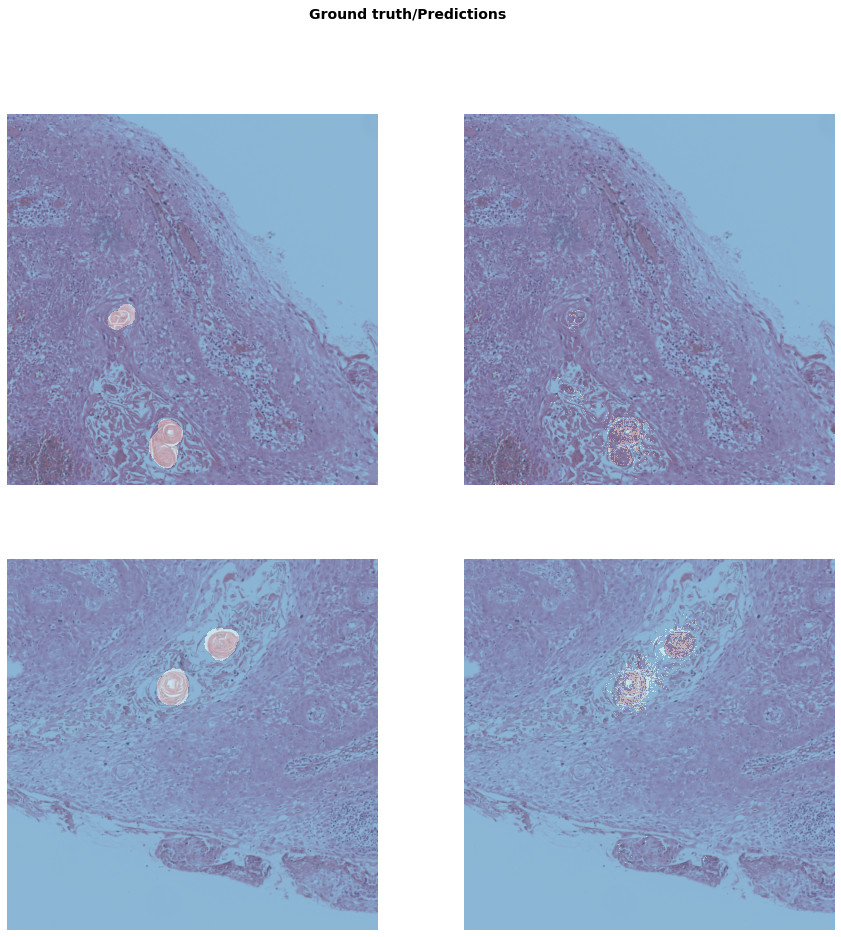

In [ ]:
learn.show_results(ds_type=DatasetType.Train, rows=2, figsize=(15,15))

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


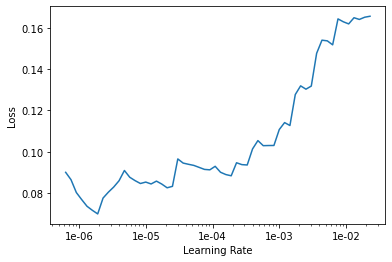

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lrs = slice(lr/10,2e-6) # learning rate slicing

In [ ]:
learn.fit_one_cycle(20, lrs, pct_start=0.8)

In [ ]:
learn.save('stage-2');

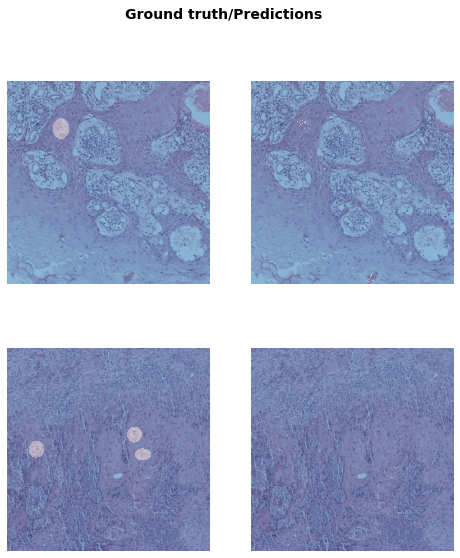

In [ ]:
learn.load('stage-2')
learn.show_results(rows=5, figsize=(8,9))

## Predictions on Validation Set

In [ ]:
names_valid = data.valid_ds.items
names_valid

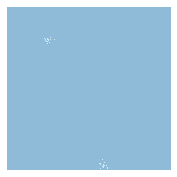

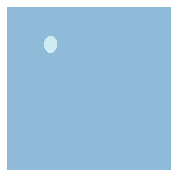

In [ ]:
p = learn.predict(data.valid_ds.x[0])
p[0].show()
data.valid_ds.y[0].show()

In [ ]:

for i in range(0, len(names_valid)):
    p = learn.predict(data.valid_ds.x[i])
    p[0].save('/content/drive/My Drive/Keratin Pearl/Tiling/predictions_keratin_pearl/' + names_valid[i].stem + '.png')

## Saving Final Model

In [ ]:
learn.export()

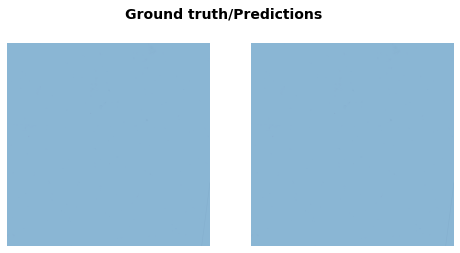

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

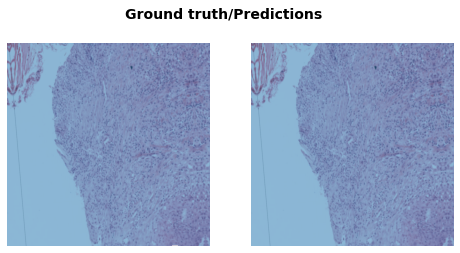

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

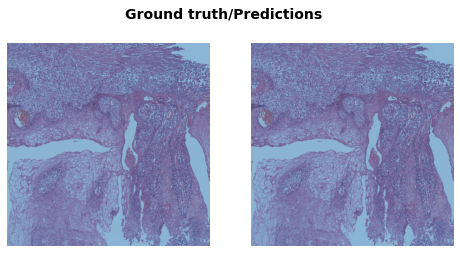

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

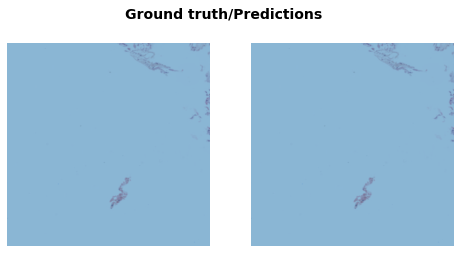

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

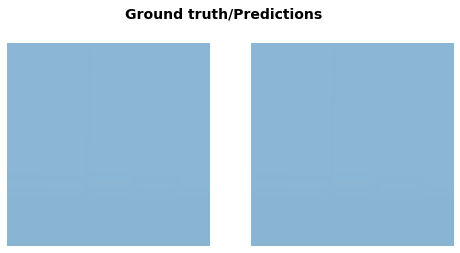

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

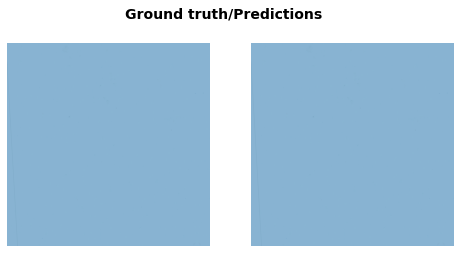

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

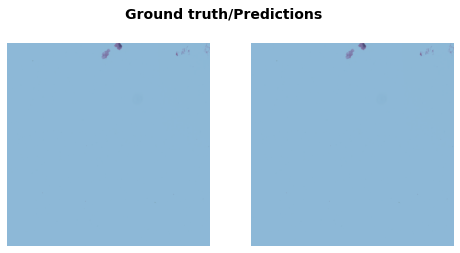

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

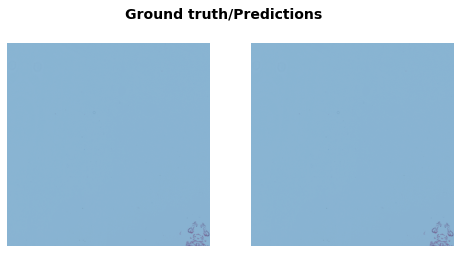

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

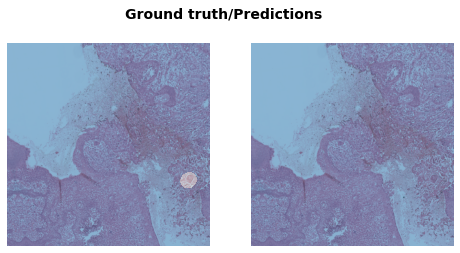

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

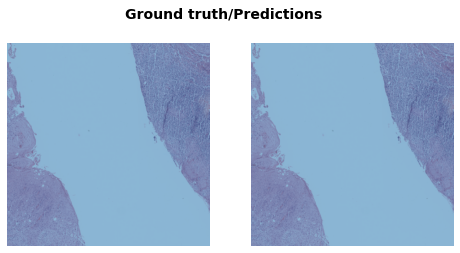

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

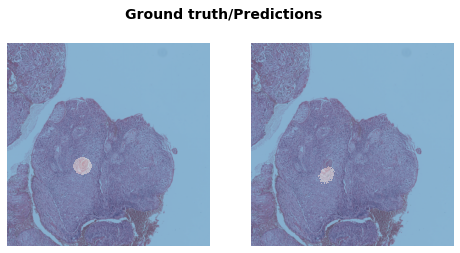

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

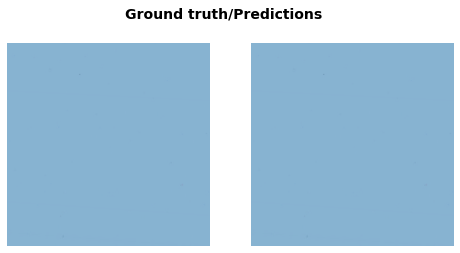

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

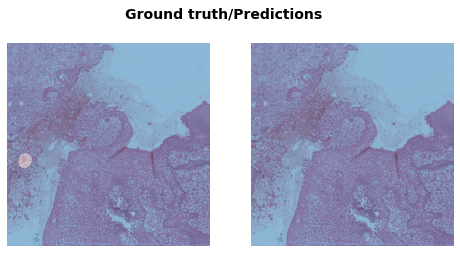

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

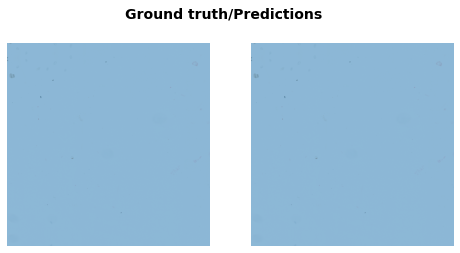

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

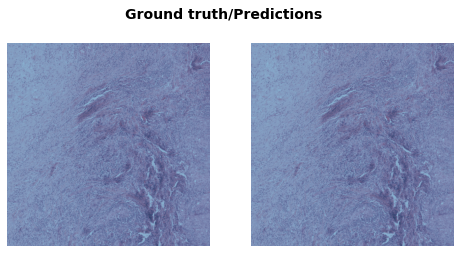

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

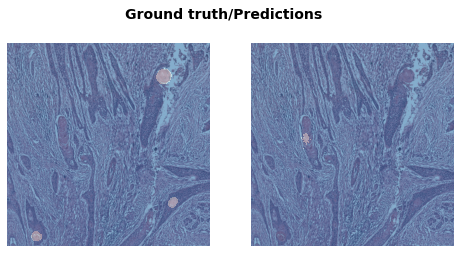

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

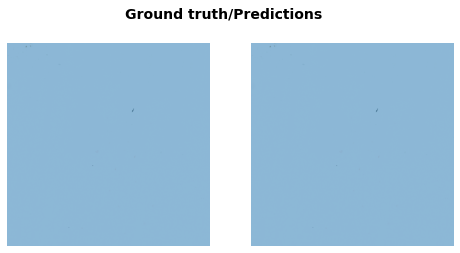

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

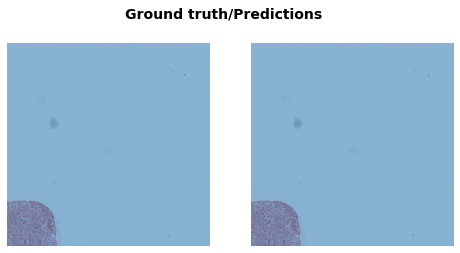

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

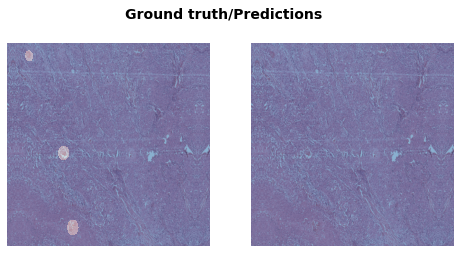

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

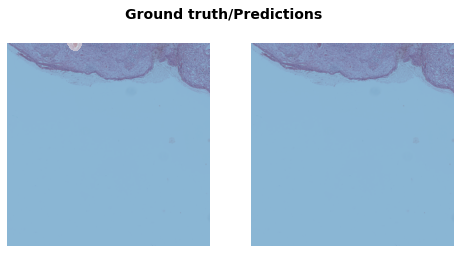

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

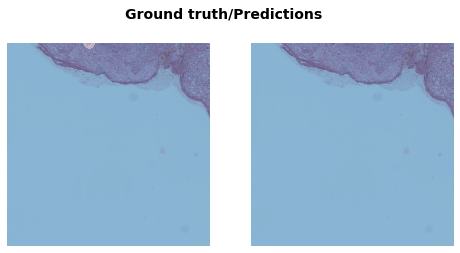

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

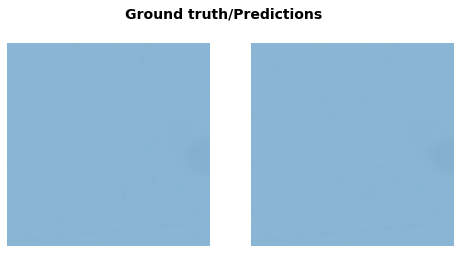

In [ ]:
learn.show_results(ds_type=DatasetType.Train)